In [1]:
# Install core ML & NLP libs
!pip -q install numpy pandas scikit-learn nltk matplotlib seaborn wordcloud
# Install Hugging Face stack compatible with Colab torch CPU
!pip -q install -U transformers==4.44.2 accelerate==1.0.1 datasets==3.1.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
import os, re, json, random, string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ( accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support )
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Load dataset (upload CSV file to Colab before running)
DATA_PATH = "/content/Mental_health.csv"

df = pd.read_csv('Mental_health.csv')

# Preview dataset
df.head(10)


,text,status
0,"""My mind is a never-ending cycle of worry, and...",anxiety
1,Despite the sun shining and birds singing outs...,bipolar
2,"I'm drowning in responsibilities, each one dem...",stress
3,"""My emotions shift like the wind, leaving me u...",personality disorder
4,"I'm trapped in a whirlwind of thoughts, unable...",anxiety
5,"Despite the sun shining outside, the depths of...",bipolar
6,"""I'm drowning in tasks and responsibilities, e...",stress
7,"""I want to be true to myself, but who am I, re...",personality disorder
8,"""Every moment is a battlefield in my mind. The...",anxiety
9,"Example: This morning, I felt a spark of creat...",bipolar


In [6]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Column names
print("\nColumns:", df.columns.tolist())

# Data information
df.info()

# Missing value analysis
df.isnull().sum()

Dataset Shape: (103488, 2)

Columns: ['text', 'status']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103488 entries, 0 to 103487
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    103488 non-null  object
 1   status  103488 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


,0
text,0
status,0


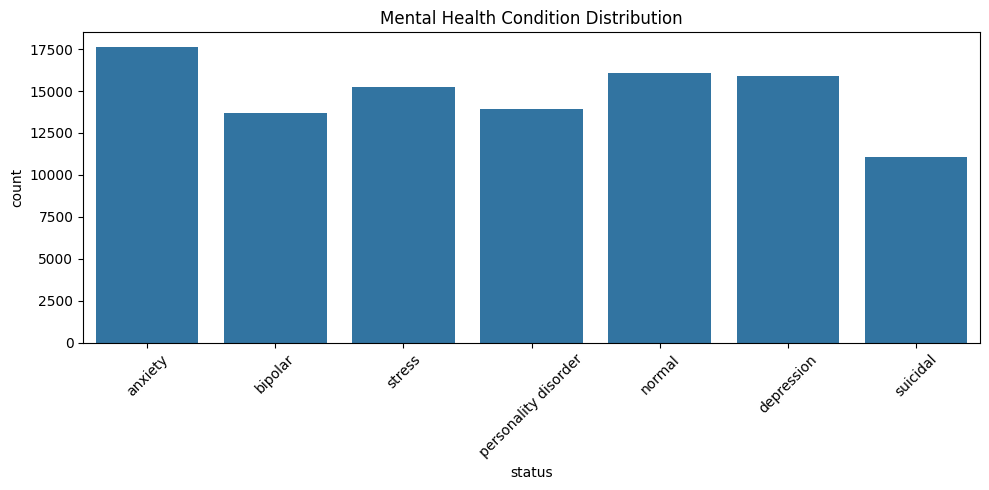

In [7]:
# Class distribution
df['status'].value_counts()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='status')
plt.title("Mental Health Condition Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
df['text_length'] = df['text'].apply(len)

df['text_length'].describe()

,text_length
count,103488.000000
mean,435.454613
std,657.801257
min,2.000000
25%,135.000000
50%,198.000000
75%,547.000000
max,27588.000000


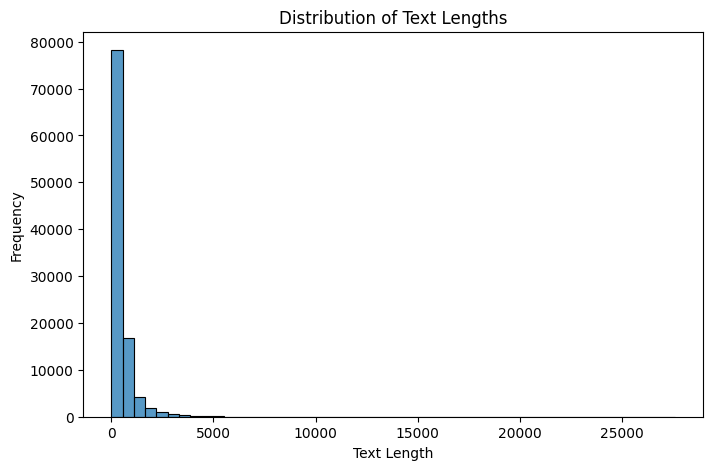

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=50)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [12]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text: str) -> str:
    """
    Cleans and preprocesses input text for NLP modeling.
    Steps:
    - Lowercasing
    - Remove numbers & punctuation
    - Tokenization
    - Stopword removal
    - Lemmatization
    """
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words
    ]

    return " ".join(tokens)


In [1]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

df['clean_text'] = df['text'].apply(preprocess_text)
df[['text', 'clean_text']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


NameError: name 'df' is not defined

In [ ]:
# Install core ML & NLP libs
!pip -q install numpy pandas scikit-learn nltk matplotlib seaborn wordcloud
# Install Hugging Face stack with newer transformers and peft, forcing reinstallation to resolve potential conflicts
!pip uninstall -y transformers accelerate datasets peft pyarrow
!pip -q install transformers accelerate datasets peft pyarrow


Found existing installation: transformers 4.39.0
Uninstalling transformers-4.39.0:
  Successfully uninstalled transformers-4.39.0
Found existing installation: accelerate 0.28.0
Uninstalling accelerate-0.28.0:
  Successfully uninstalled accelerate-0.28.0
Found existing installation: datasets 2.18.0
Uninstalling datasets-2.18.0:
  Successfully uninstalled datasets-2.18.0
Found existing installation: peft 0.18.0
Uninstalling peft-0.18.0:
  Successfully uninstalled peft-0.18.0
Found existing installation: pyarrow 15.0.0
Uninstalling pyarrow-15.0.0:
  Successfully uninstalled pyarrow-15.0.0


In [ ]:
import os, re, json, random, string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
import torch # Moved torch import here to ensure early availability


In [2]:
# Install core ML & NLP libs
!pip -q install numpy pandas scikit-learn nltk matplotlib seaborn wordcloud
# Install Hugging Face stack with newer transformers and peft
!pip -q install -U transformers accelerate datasets peft


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.3/512.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 36.8 MB/s eta 0:00:00


In [3]:
import os, re, json, random, string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ( accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support )
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# Load dataset (upload CSV file to Colab before running)
DATA_PATH = "/content/Mental_health.csv"

df = pd.read_csv(DATA_PATH)

# Preview dataset
df.head(10)


,text,status
0,"""My mind is a never-ending cycle of worry, and...",anxiety
1,Despite the sun shining and birds singing outs...,bipolar
2,"I'm drowning in responsibilities, each one dem...",stress
3,"""My emotions shift like the wind, leaving me u...",personality disorder
4,"I'm trapped in a whirlwind of thoughts, unable...",anxiety
5,"Despite the sun shining outside, the depths of...",bipolar
6,"""I'm drowning in tasks and responsibilities, e...",stress
7,"""I want to be true to myself, but who am I, re...",personality disorder
8,"""Every moment is a battlefield in my mind. The...",anxiety
9,"Example: This morning, I felt a spark of creat...",bipolar


In [7]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Column names
print("\nColumns:", df.columns.tolist())

# Data information
df.info()

# Missing value analysis
df.isnull().sum()


Dataset Shape: (103488, 2)

Columns: ['text', 'status']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103488 entries, 0 to 103487
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    103488 non-null  object
 1   status  103488 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


,0
text,0
status,0


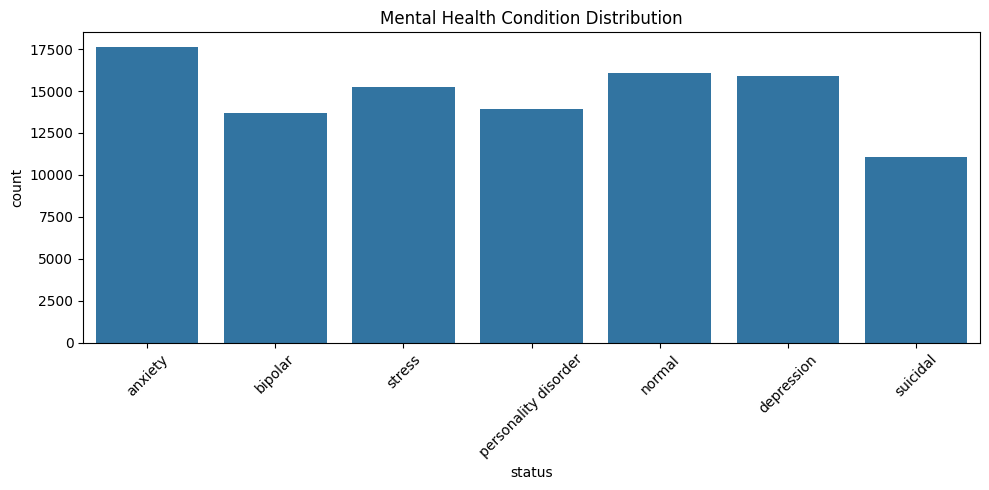

In [8]:
# Class distribution
df['status'].value_counts()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='status')
plt.title("Mental Health Condition Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
df['text_length'] = df['text'].apply(len)

df['text_length'].describe()


,text_length
count,103488.000000
mean,435.454613
std,657.801257
min,2.000000
25%,135.000000
50%,198.000000
75%,547.000000
max,27588.000000


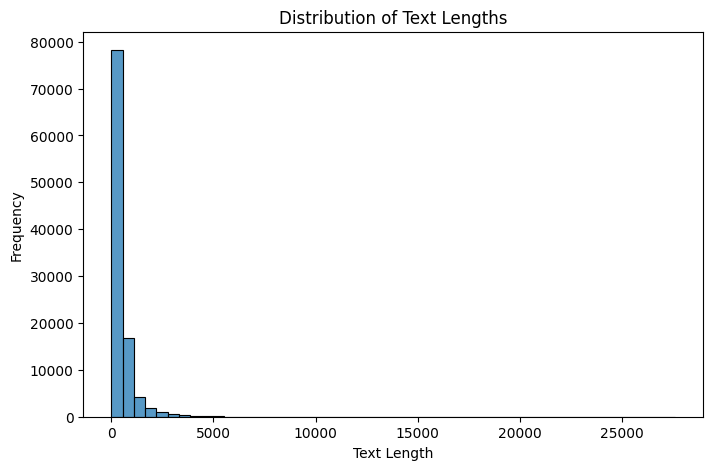

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=50)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()


In [11]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text: str) -> str:
    """
    Cleans and preprocesses input text for NLP modeling.
    Steps:
    - Lowercasing
    - Remove numbers & punctuation
    - Tokenization
    - Stopword removal
    - Lemmatization
    """
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words
    ]

    return " ".join(tokens)


In [12]:
df['clean_text'] = df['text'].apply(preprocess_text)
df[['text', 'clean_text']].head()


,text,clean_text
0,"""My mind is a never-ending cycle of worry, and...",mind neverending cycle worry even simplest tas...
1,Despite the sun shining and birds singing outs...,despite sun shining bird singing outside windo...
2,"I'm drowning in responsibilities, each one dem...",im drowning responsibility one demanding atten...
3,"""My emotions shift like the wind, leaving me u...",emotion shift like wind leaving uncertain trul...
4,"I'm trapped in a whirlwind of thoughts, unable...",im trapped whirlwind thought unable focus anyt...


In [13]:
X = df['clean_text']
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 82790
Testing samples: 20698


In [14]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_train_tfidf.shape


(82790, 5000)

In [15]:
log_reg_model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

log_reg_model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000, n_jobs=-1)

Logistic Regression Accuracy: 0.8681
Logistic Regression Classification Report:
                      precision    recall  f1-score   support

             anxiety       0.94      0.94      0.94      3524
             bipolar       0.98      0.93      0.96      2742
          depression       0.69      0.73      0.71      3180
              normal       0.84      0.95      0.89      3214
personality disorder       0.99      0.95      0.97      2783
              stress       0.95      0.89      0.92      3046
            suicidal       0.67      0.63      0.65      2209

            accuracy                           0.87     20698
           macro avg       0.87      0.86      0.86     20698
        weighted avg       0.87      0.87      0.87     20698



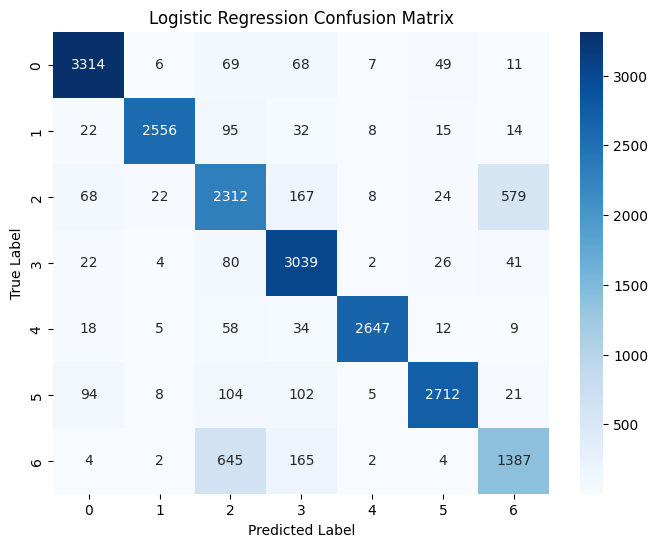

In [16]:
y_pred_logreg = log_reg_model.predict(X_test_tfidf)

# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")
# Classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Random Forest Accuracy: 0.8494
Random Forest Classification Report:
                      precision    recall  f1-score   support

             anxiety       0.92      0.93      0.92      3524
             bipolar       0.99      0.91      0.95      2742
          depression       0.61      0.79      0.69      3180
              normal       0.82      0.93      0.87      3214
personality disorder       0.99      0.93      0.96      2783
              stress       0.98      0.85      0.91      3046
            suicidal       0.70      0.51      0.59      2209

            accuracy                           0.85     20698
           macro avg       0.86      0.84      0.84     20698
        weighted avg       0.86      0.85      0.85     20698



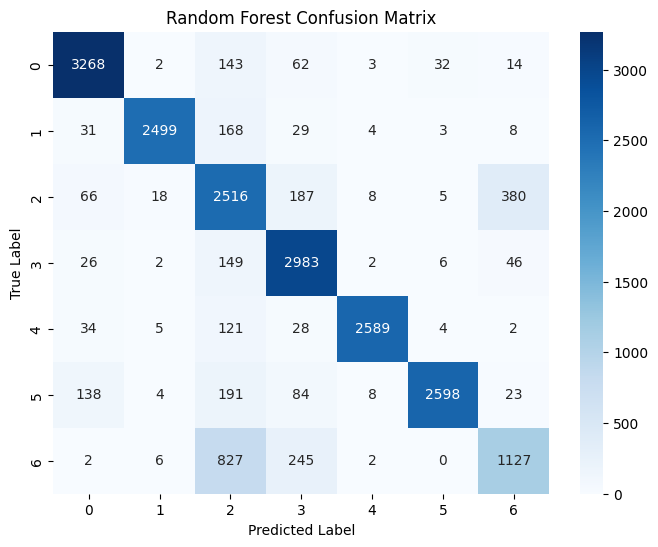

In [17]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_tfidf, y_train)

rf_preds = rf_model.predict(X_test_tfidf)

# Accuracy
accuracy_rf = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [18]:
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch

# Label encoding for BERT
label2id = {label: idx for idx, label in enumerate(y.unique())}
id2label = {v: k for k, v in label2id.items()}

y_train_bert = y_train.map(label2id)
y_test_bert = y_test.map(label2id)


ValueError: pyarrow.lib.IpcReadOptions size changed, may indicate binary incompatibility. Expected 112 from C header, got 104 from PyObject

In [19]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

train_encodings = tokenizer(
    X_train.tolist(),
    truncation=True,
    padding=True,
    max_length=128
)

test_encodings = tokenizer(
    X_test.tolist(),
    truncation=True,
    padding=True,
    max_length=128
)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [20]:
class MentalHealthDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.tolist()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = MentalHealthDataset(train_encodings, y_train_bert)
test_dataset = MentalHealthDataset(test_encodings, y_test_bert)


NameError: name 'torch' is not defined

In [21]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="no",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    logging_steps=100,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

trainer.train()

bert_preds_raw = trainer.predict(test_dataset).predictions
bert_preds = np.argmax(bert_preds_raw, axis=1)
bert_preds_labels = [id2label[pred_id] for pred_id in bert_preds]

# Accuracy
accuracy_bert = accuracy_score(y_test, bert_preds_labels)
print(f"BERT Accuracy: {accuracy_bert:.4f}")
# Classification report
print("BERT Classification Report:")
print(classification_report(y_test, bert_preds_labels))

# Confusion Matrix
cm_bert = confusion_matrix(y_test, bert_preds_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues')
plt.title("BERT Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


NameError: name 'label2id' is not defined

In [22]:
results = {
    'Logistic Regression': accuracy_logreg,
    'Random Forest': accuracy_rf,
    'BERT': accuracy_bert
}

comparison_df = pd.DataFrame.from_dict(
    results,
    orient='index',
    columns=['Accuracy']
)

display(comparison_df)


NameError: name 'accuracy_bert' is not defined

In [23]:
import joblib

joblib.dump(log_reg_model, "logistic_regression_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [24]:
# --- Logistic Regression Prediction ---
def predict_logreg(text):
    # Preprocess + vectorize
    clean = preprocess_text(text)
    vec = tfidf_vectorizer.transform([clean])
    pred = log_reg_model.predict(vec)[0]
    return pred

# --- BERT Prediction ---
def predict_bert(text):
    # Tokenize
    inputs = tokenizer(text, truncation=True, padding=True, max_length=128, return_tensors="pt")
    # Run model
    model.eval() # Set model to evaluation mode
    with torch.no_grad(): # Disable gradient calculations
        outputs = model(**inputs)
    logits = outputs.logits.detach().cpu().numpy()
    pred_id = logits.argmax(axis=-1)[0]
    return id2label[pred_id]

# --- Test with a sample ---
sample_text = "I am feeling excited"
print("Input:", sample_text)
print("Logistic Regression Prediction:", predict_logreg(sample_text))
print("BERT Prediction:", predict_bert(sample_text))

sample_text_2 = "This is a very stressful situation, I cannot cope."
print("\nInput:", sample_text_2)
print("Logistic Regression Prediction:", predict_logreg(sample_text_2))
print("BERT Prediction:", predict_bert(sample_text_2))


Input: I am feeling excited
Logistic Regression Prediction: normal


NameError: name 'model' is not defined

In [27]:
X = df['clean_text']
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 82790
Testing samples: 20698


In [28]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_train_tfidf.shape

(82790, 5000)

In [29]:
log_reg_model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

log_reg_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_tfidf, y_train)

rf_preds = rf_model.predict(X_test_tfidf)

In [46]:
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
import torch

# Label encoding for BERT
label2id = {label: idx for idx, label in enumerate(y.unique())}
id2label = {v: k for k, v in label2id.items()}

y_train_bert = y_train.map(label2id)
y_test_bert = y_test.map(label2id)



RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):
No module named 'transformers.modeling_layers'

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

train_encodings = tokenizer(
    X_train.tolist(),
    truncation=True,
    padding=True,
    max_length=128
)

test_encodings = tokenizer(
    X_test.tolist(),
    truncation=True,
    padding=True,
    max_length=128
)

In [ ]:
class MentalHealthDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.tolist()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = MentalHealthDataset(train_encodings, y_train_bert)
test_dataset = MentalHealthDataset(test_encodings, y_test_bert)

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="no",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    logging_steps=100,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

trainer.train()

In [ ]:
comparison_df = pd.DataFrame.from_dict(
    results,
    orient='index',
    columns=['Accuracy']
)

comparison_df

In [ ]:
y_pred = log_reg_model.predict(X_test_tfidf)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
# Classification report
print(classification_report(y_test, y_pred))

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
import joblib

joblib.dump(log_reg_model, "logistic_regression_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

In [ ]:
# --- Logistic Regression Prediction ---
def predict_logreg(text):
    # Preprocess + vectorize
    clean = preprocess_text(text)
    vec = tfidf_vectorizer.transform([clean])
    pred = log_reg_model.predict(vec)[0]
    return pred

# --- BERT Prediction ---
def predict_bert(text):
    # Tokenize
    inputs = tokenizer(text, truncation=True, padding=True, max_length=128, return_tensors="pt")
    # Run model
    outputs = model(**inputs)
    logits = outputs.logits.detach().cpu().numpy()
    pred_id = logits.argmax(axis=-1)[0]
    return id2label[pred_id]

# --- Test with a sample ---
sample_text = "I am feeling excited"
print("Input:", sample_text)
print("Logistic Regression Prediction:", predict_logreg(sample_text))
print("BERT Prediction:", predict_bert(sample_text))
